# Understanding Distributions
## Abhishek Raje: BM22BTECH11002

In [240]:
#importing libraries
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1)Plot the below as scatter plots 

1. $Z= [X,Y]$ where $X$,$Y$ are $ i.i.d$ and are drawn from N($u$,$\sigma$)
2. $Z= [X,Y]$ where $X$,$Y$ are $ i.i.d$ and are drawn from U($a$,$b$)
3. $Z= [X,Y]$ where $X$,$Y$ are $ i.i.d$ and are drawn from Exp($\lambda$)
4. $Z= [X,Y]$ where $\sigma < 0$ and $\sigma > 0$
5. $Z= aU+BV$ and $Z = aU-bV$. Guess what is $\sigma < 0$ graphically using the scatter plots

### Defining Plotting Function

In [190]:
def plot_distributions(x,y):
    colors = 'orange'
    sizes = 100   
    plt.scatter(x, y, c=colors, s=sizes)
    linear_regression(x,y)
    plt.xlabel('Random Variable X')
    plt.ylabel('Random Variable Y')
    plt.title('Scatter Plots for Corelation Analysis')
    
    plt.grid(True)
    plt.show()


### Cross Corelation
$$ Cov(x,y)=E((X-u_1)(Y-u_2)) $$
$$ coefficient(x,y)=\frac{E((X-u_1)(Y-u_2))}{\sigma_x \sigma_y} $$
$$ -1<=coefficient(x,y)<=1$$


In [191]:
def cov_coefficient(x,y):
    return np.mean((x-np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y))

### Slope in Linear Regression
$$m=\frac{Cov(x,y)}{Var(X)}$$

In [192]:
def linear_regression(x,y):
    m=cov_coefficient(x,y)*(np.std(y)/np.std(x))
    x=np.linspace(np.min(x),np.max(x),100)
    y=m*(x-np.mean(x))+np.mean(y)
    plt.plot(x,y,color="red")
    print(f"Slope of  Regression Line:{m}")

## Both From Normal

Slope of  Regression Line:-0.04355184356298775


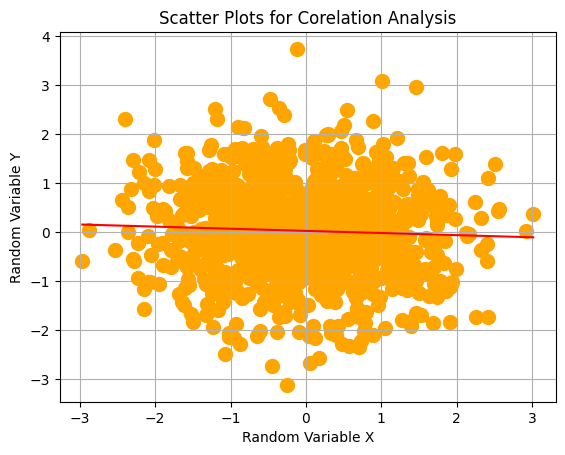

In [193]:
x=stats.norm(scale=1,loc=0).rvs(1000)
y=stats.norm(scale=1,loc=0).rvs(1000)
plot_distributions(x,y)


## Both From Uniform

Slope of  Regression Line:0.0072003142024553045


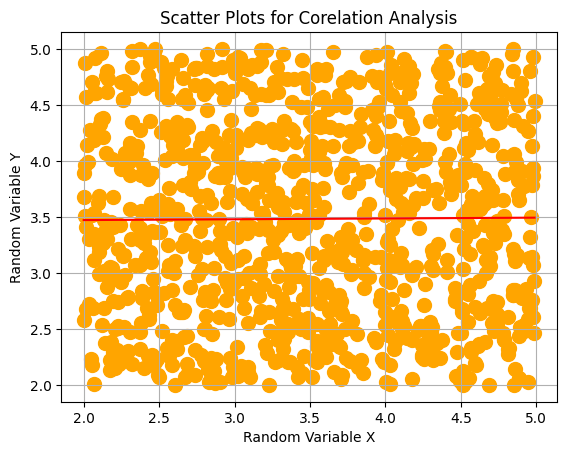

In [194]:
x=stats.uniform(2,3).rvs(1000)
y=stats.uniform(2,3).rvs(1000)
plot_distributions(x,y)

## Both From Exponential

Slope of  Regression Line:-0.021786982658339102


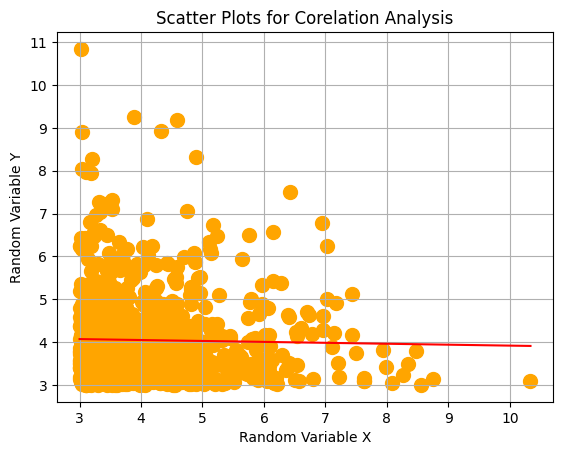

In [264]:
x=stats.expon(3).rvs(1000)
y=stats.expon(3).rvs(1000)
plot_distributions(x,y)

## Scatter Plot such that
$$Z=[X,Y]$$
$$ \sigma>0$$

In [196]:
x=stats.norm(scale=1,loc=0).rvs(1000)
y=stats.norm(scale=1,loc=0).rvs(1000)
U=2*x+y
V=-x+y

Slope of  Regression Line:2.0301982620732777


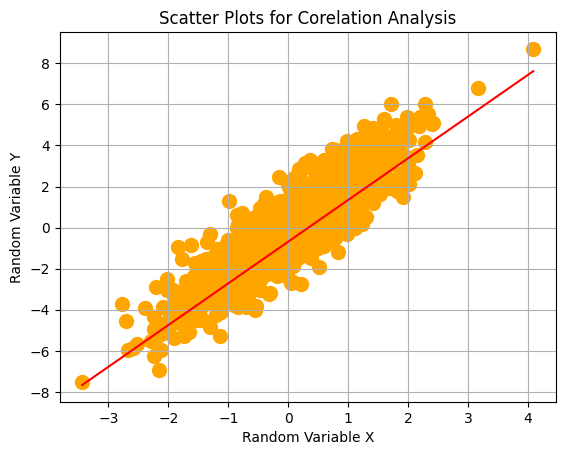

In [197]:
plot_distributions(x,U)

## Scatter Plot such that
$$Z=[X,Y]$$
$$ \sigma<0$$

Slope of  Regression Line:-0.9698017379267231


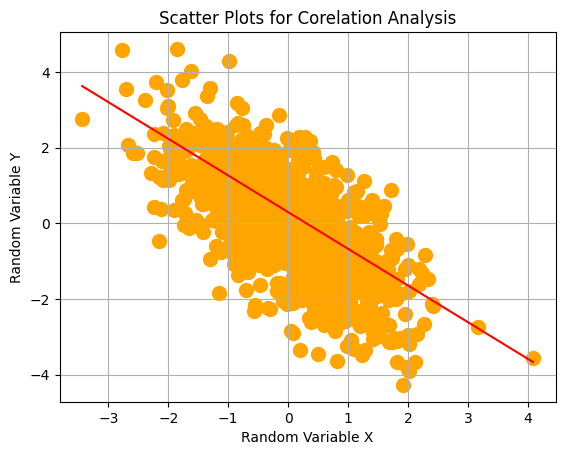

In [198]:
plot_distributions(x,V)

## Scatter Plot such that
$$Z=[X,Y]$$
$$ Z= aU+BV  \text{  and  } Z = aU-bV $$


In [210]:
u=stats.norm(scale=1,loc=0).rvs(1000)
v=stats.norm(scale=1,loc=0).rvs(1000)

Calculating slope
$$m=\frac{a^2-b^2}{a^2+b^2} $$

$$m>0 \forall  |a|>|b|$$
$$m<0 \forall  |b|>|a|$$


Slope of  Regression Line:0.5936519030193438


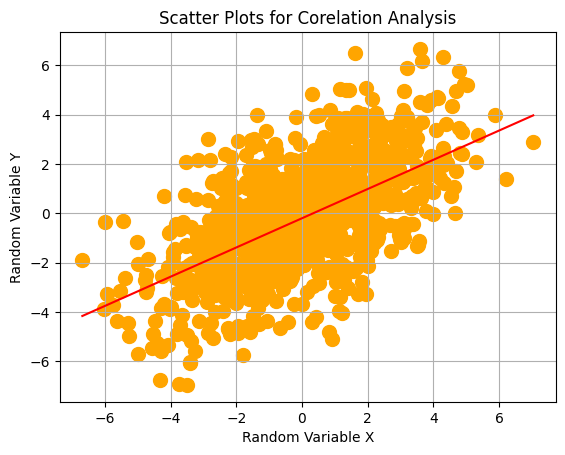

Slope of line for specific case :0.6


In [217]:
#Positive Slope
a=2
b=1
x=a*u+b*v
y=a*u-b*v
plot_distributions(x,y)
m=(a**2-b**2)/(a**2+b**2)
print(f"Slope of line for specific case :{m}")

Slope of  Regression Line:-0.624697106120999


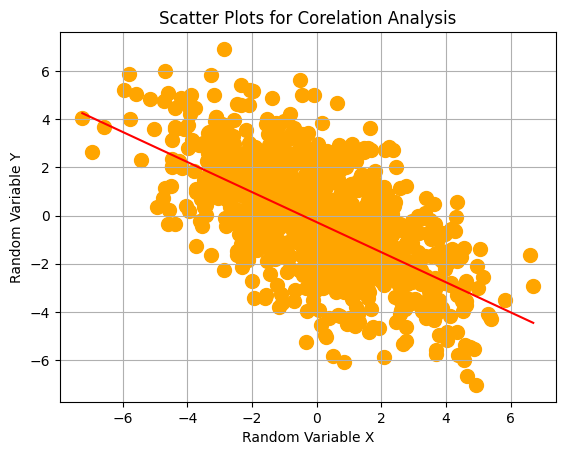

Slope of line for specific case :-0.6


In [219]:
#Negative Slope
a=1
b=2
x=a*u+b*v
y=a*u-b*v
plot_distributions(x,y)
m=(a**2-b**2)/(a**2+b**2)
print(f"Slope of line for specific case :{m}")

# 2.generate data X1, X2 ...X10 such that

1. X1 = U(0,1)
2. X2 = Exp(1.5)
3. X3 = N(10,0.5)
4. X4 = N(11,3) + X3
5. X5 = X2+X3
6. X6 = 3X1+2X2
7. X7 = 5X3 + N(0,1)
8. X8 = X5+2X2
9. X9 = 3X3 + 9
10. X10 = Sum(Xi) i= 1 to 10
Complete the cross covariance matrix for the data


In [233]:
RandomVar=[]
RandomVar.append(stats.uniform(0,1).rvs(1000))
RandomVar.append(stats.expon(1.5).rvs(1000))
RandomVar.append(stats.norm(loc=10,scale=0.5).rvs(1000))
RandomVar.append(stats.norm(loc=11,scale=3).rvs(1000)+RandomVar[2])
RandomVar.append(RandomVar[1]+RandomVar[2])
RandomVar.append(3*RandomVar[0]+2*RandomVar[1])
RandomVar.append(5*RandomVar[2]+stats.norm(loc=0,scale=1).rvs(1000))
RandomVar.append(RandomVar[4]+2*RandomVar[1])
RandomVar.append(2*RandomVar[2]+9)
RandomVar.append(np.sum(RandomVar,axis=0))

In [256]:
def covariance_matrix(RandomVar):
    CovarianceMatrix=[]
    for i in range(len(RandomVar)):
        row=[]
        for j in range(len(RandomVar)):
            row.append(cov_coefficient(RandomVar[i],RandomVar[j]))
        CovarianceMatrix.append(row)
    return CovarianceMatrix

## HeatMap
As it can be observed the Random Variables that have a linear relation have a higher corelation coefficient

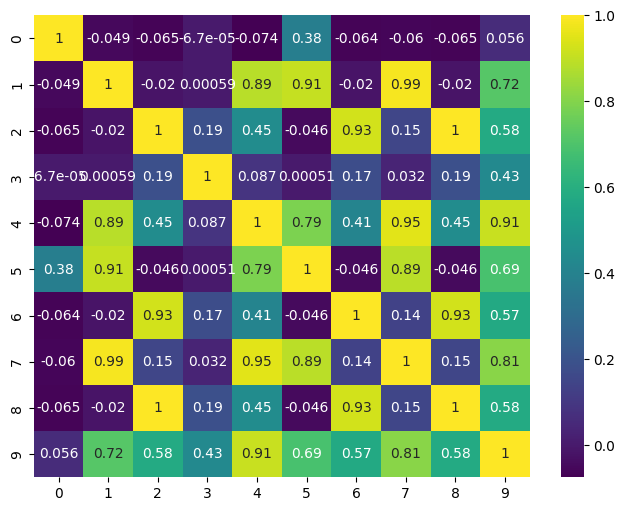

In [263]:
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix(RandomVar), annot=True, cmap='viridis')
plt.show()

### 3.paper and pen exercise
1. X1 = N(5,2)
2. X2 = 3 + N(6,3)
3. X3 = X1+X2
4. Calculate the variance of Sum(Xi) i = 1 to 3

$$ Var(\sum X_i) $$
$$ Var(X_1+X_2+X_3)= Var(2(X_1+X_2))=4Var(X_1+X_2)$$
$$ \text{now since $X_1$ and $X_2$ are independant as they come from different distributions }$$
$$4Var(X_1+X_2)=4(Var(X_1)+Var(X_2)=4(2^2+3^2)=52 $$
$$ Var(\sum X_i)=52 $$

### D). generate the below data, Compute mean and std.deviation for X1 to X4, and √X, X^2

1. X1 = N(0,3)
2. X2= 4 + N(0,3)
3. X3 = 4+ 2N(0,3)
4. X4 = 5N(1,2)

Compute mean and std.deviation for X1 to X4, and √X, X^2

In [270]:
X_1=stats.norm(loc=0,scale=3).rvs(100)
X_2=4+stats.norm(loc=0,scale=3).rvs(100)
X_3=4+2*stats.norm(loc=0,scale=3).rvs(100)
X_4=5*stats.norm(loc=1,scale=2).rvs(100)

#sqrt
X_1_sqrt=np.sqrt(np.abs(X_1))
X_2_sqrt=np.sqrt(np.abs(X_2))
X_3_sqrt=np.sqrt(np.abs(X_3))
X_4_sqrt=np.sqrt(np.abs(X_4))
#square
X_1_square=np.square(X_1)
X_2_square=np.square(X_2)
X_3_square=np.square(X_3)
X_4_square=np.square(X_4)

 The Difference between computed value and ideal value is due to taking a sample from the dataset as n $\to \inf$ the computed mean converges to the true mean

In [271]:
## means of Random Variable
print(f"The mean of Random Variable X_1= {np.mean(X_1)}")
print(f"The mean of Random Variable X_2= {np.mean(X_2)}")
print(f"The mean of Random Variable X_3= {np.mean(X_3)}")
print(f"The mean of Random Variable X_4= {np.mean(X_4)}")

The mean of Random Variable X_1= -0.2030888936582929
The mean of Random Variable X_2= 3.6368754319039907
The mean of Random Variable X_3= 4.724297675232793
The mean of Random Variable X_4= 3.46600616037951


In [272]:
## means of sqrt of Random Variable
print(f"The mean of Random Variable sqrt(X_1)= {np.mean(X_1_sqrt)}")
print(f"The mean of Random Variable sqrt(X_2)= {np.mean(X_2_sqrt)}")
print(f"The mean of Random Variable sqrt(X_3)= {np.mean(X_3_sqrt)}")
print(f"The mean of Random Variable sqrt(X_4)= {np.mean(X_4_sqrt)}")

The mean of Random Variable sqrt(X_1)= 1.4166970405911337
The mean of Random Variable sqrt(X_2)= 1.8714371417413265
The mean of Random Variable sqrt(X_3)= 2.331092722446388
The mean of Random Variable sqrt(X_4)= 2.7856168460411386


In [274]:
## means of square of Random Variable
print(f"The mean of Random Variable squarw(X_1)= {np.mean(X_1_square)}")
print(f"The mean of Random Variable square(X_2)= {np.mean(X_2_square)}")
print(f"The mean of Random Variable square(X_3)= {np.mean(X_3_square)}")
print(f"The mean of Random Variable square(X_4)= {np.mean(X_4_square)}")

The mean of Random Variable squarw(X_1)= 9.363564558185873
The mean of Random Variable square(X_2)= 20.222031488201193
The mean of Random Variable square(X_3)= 63.47473496715758
The mean of Random Variable square(X_4)= 124.2162385743074


In [278]:
## standard devaiation of Random Variable
print(f"The standard deviation of Random Variable X_1= {np.std(X_1)}")
print(f"The standard deviation of Random Variable X_2= {np.std(X_2)}")
print(f"The standard deviation of Random Variable X_3= {np.std(X_3)}")
print(f"The standard deviation of Random Variable X_4= {np.std(X_4)}")

The standard deviation of Random Variable X_1= 3.053247362965949
The standard deviation of Random Variable X_2= 2.644838101096994
The standard deviation of Random Variable X_3= 6.415274463571111
The standard deviation of Random Variable X_4= 10.592593632841707


In [279]:
## standard deviation of sqrt of Random Variable
print(f"The standard deviation of Random Variable sqrt(X_1)= {np.std(X_1_sqrt)}")
print(f"The standard deviation of Random Variable sqrt(X_2)= {np.std(X_2_sqrt)}")
print(f"The standard deviation of Random Variable sqrt(X_3)= {np.std(X_3_sqrt)}")
print(f"The standard deviation of Random Variable sqrt(X_4)= {np.std(X_4_sqrt)}")

The standard deviation of Random Variable sqrt(X_1)= 0.6413243966342701
The standard deviation of Random Variable sqrt(X_2)= 0.6274626171247657
The standard deviation of Random Variable sqrt(X_3)= 0.9577447482047359
The standard deviation of Random Variable sqrt(X_4)= 1.1489484510522503


In [280]:
## standard of square of Random Variable
print(f"The standard deviation of Random Variable squarw(X_1)= {np.std(X_1_square)}")
print(f"The standard deviation of Random Variable square(X_2)= {np.std(X_2_square)}")
print(f"The standard deviation of Random Variable square(X_3)= {np.std(X_3_square)}")
print(f"The standard deviation of Random Variable square(X_4)= {np.std(X_4_square)}")

The standard deviation of Random Variable squarw(X_1)= 12.792840669174206
The standard deviation of Random Variable square(X_2)= 20.590299530355118
The standard deviation of Random Variable square(X_3)= 92.876535836574
The standard deviation of Random Variable square(X_4)= 160.35060593187785
